In [121]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [122]:
data = pd.read_csv('customer.csv')

In [123]:
data

,id,cinsiyyət,Yaşlı təbəqə,tərəfdaş,asılı olanlar,müddəti,Telefon Xidməti,Birdən çox xətt,İnternet servisi,onlayn təhlükəsizlik,...,texniki dəstək,canli tv,filmlər,müqavilə,Kağızsız Hesablaşma,ödəniş metodu,Aylıq Ödənişlər,Ümumi ödənişlər,Churn,"TelefonXidməti,KağızsızHesablaşma"
0,7590-VHVEG,Qadın,0,Hə,Yox,1,Yox,Teleon xidmeti yoxdur,DSL,Yox,...,Yox,Yox,Yox,ayliq,Hə,elektronik cek,29.85,29.85,Yox,Yox Hə
1,5575-GNVDE,Kişi,0,Yox,Yox,34,Hə,Yox,DSL,Hə,...,Yox,Yox,Yox,illik,Yox,mail cek,56.95,1889.5,Yox,Hə Yox
2,3668-QPYBK,Kişi,0,Yox,Yox,2,Hə,Yox,DSL,Hə,...,Yox,Yox,Yox,ayliq,Hə,mail cek,53.85,108.15,Hə,Hə Hə
3,7795-CFOCW,Kişi,0,Yox,Yox,45,Yox,Teleon xidmeti yoxdur,DSL,Hə,...,Hə,Yox,Yox,illik,Yox,bank transfer,42.30,1840.75,Yox,Yox Yox
4,9237-HQITU,NaN,0,Yox,Yox,2,Hə,Yox,Fiber optic,Yox,...,Yox,Yox,Yox,ayliq,Hə,elektronik cek,70.70,151.65,Hə,Hə Hə
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Kişi,0,Hə,Hə,24,Hə,Hə,DSL,Hə,...,Hə,Hə,Hə,illik,Hə,mail cek,84.80,1990.5,Yox,Hə Hə
7039,2234-XADUH,Qadın,0,Hə,Hə,72,Hə,Hə,Fiber optic,Yox,...,Yox,Hə,Hə,illik,Hə,kredit karti,103.20,7362.9,Yox,Hə Hə
7040,4801-JZAZL,Qadın,0,Hə,Hə,11,Yox,Teleon xidmeti yoxdur,DSL,Hə,...,Yox,Yox,Yox,ayliq,Hə,elektronik cek,29.60,346.45,Yox,Yox Hə
7041,8361-LTMKD,Kişi,1,Hə,Yox,4,Hə,Hə,Fiber optic,Yox,...,Yox,Yox,Yox,ayliq,Hə,mail cek,74.40,306.6,Hə,Hə Hə


In [124]:
data["cinsiyyət"].value_counts()

,count
cinsiyyət,
Kişi,3508
Qadın,3435


In [125]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 22 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   id                                 7043 non-null   object 
 1   cinsiyyət                          6943 non-null   object 
 2   Yaşlı təbəqə                       7043 non-null   int64  
 3   tərəfdaş                           6943 non-null   object 
 4   asılı olanlar                      7043 non-null   object 
 5   müddəti                            7043 non-null   int64  
 6   Telefon Xidməti                    7043 non-null   object 
 7   Birdən çox xətt                    7043 non-null   object 
 8   İnternet servisi                   7043 non-null   object 
 9   onlayn təhlükəsizlik               7043 non-null   object 
 10  onlayn yedəkləmə                   7043 non-null   object 
 11  Cihazın Mühafizəsi                 7043 non-null   objec

In [126]:
data.describe()

,Yaşlı təbəqə,müddəti,Aylıq Ödənişlər
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [127]:
data.loc[data.Churn == "Yox", "Churn"] = 0 #not churn
data.loc[data.Churn == "Hə", "Churn"] = 1 #churn customers

In [128]:
data.head()

,id,cinsiyyət,Yaşlı təbəqə,tərəfdaş,asılı olanlar,müddəti,Telefon Xidməti,Birdən çox xətt,İnternet servisi,onlayn təhlükəsizlik,...,texniki dəstək,canli tv,filmlər,müqavilə,Kağızsız Hesablaşma,ödəniş metodu,Aylıq Ödənişlər,Ümumi ödənişlər,Churn,"TelefonXidməti,KağızsızHesablaşma"
0,7590-VHVEG,Qadın,0,Hə,Yox,1,Yox,Teleon xidmeti yoxdur,DSL,Yox,...,Yox,Yox,Yox,ayliq,Hə,elektronik cek,29.85,29.85,0,Yox Hə
1,5575-GNVDE,Kişi,0,Yox,Yox,34,Hə,Yox,DSL,Hə,...,Yox,Yox,Yox,illik,Yox,mail cek,56.95,1889.5,0,Hə Yox
2,3668-QPYBK,Kişi,0,Yox,Yox,2,Hə,Yox,DSL,Hə,...,Yox,Yox,Yox,ayliq,Hə,mail cek,53.85,108.15,1,Hə Hə
3,7795-CFOCW,Kişi,0,Yox,Yox,45,Yox,Teleon xidmeti yoxdur,DSL,Hə,...,Hə,Yox,Yox,illik,Yox,bank transfer,42.30,1840.75,0,Yox Yox
4,9237-HQITU,NaN,0,Yox,Yox,2,Hə,Yox,Fiber optic,Yox,...,Yox,Yox,Yox,ayliq,Hə,elektronik cek,70.70,151.65,1,Hə Hə


In [129]:
data["Churn"].value_counts()

,count
Churn,
0,5174
1,1869


In [130]:
data = data.replace("Teleon xidmeti yoxdur", "Telefon xidmeti yoxdur")

<ipython-input-130-b9314b2fdce3>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data = data.replace("Teleon xidmeti yoxdur", "Telefon xidmeti yoxdur")


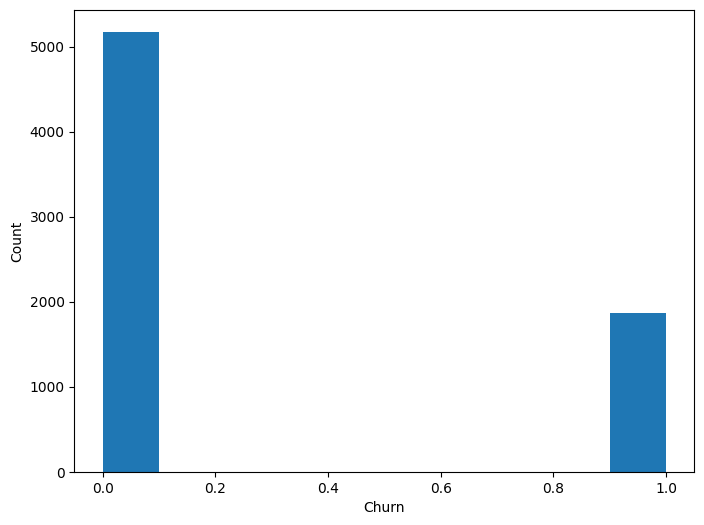

In [131]:
plt.figure(figsize = (8,6))
plt.hist(data["Churn"])
plt.xlabel("Churn")
plt.ylabel("Count")
plt.show()

In [132]:
categ_cols=data.dtypes.pipe(lambda x : x [x=="object"]).index

for c in categ_cols:
    data[c], _ =pd.factorize(data[c])
data.head()

,id,cinsiyyət,Yaşlı təbəqə,tərəfdaş,asılı olanlar,müddəti,Telefon Xidməti,Birdən çox xətt,İnternet servisi,onlayn təhlükəsizlik,...,texniki dəstək,canli tv,filmlər,müqavilə,Kağızsız Hesablaşma,ödəniş metodu,Aylıq Ödənişlər,Ümumi ödənişlər,Churn,"TelefonXidməti,KağızsızHesablaşma"
0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,29.85,0,0,0
1,1,1,0,1,0,34,1,1,0,1,...,0,0,0,1,1,1,56.95,1,0,1
2,2,1,0,1,0,2,1,1,0,1,...,0,0,0,0,0,1,53.85,2,1,2
3,3,1,0,1,0,45,0,0,0,1,...,1,0,0,1,1,2,42.30,3,0,3
4,4,-1,0,1,0,2,1,1,1,0,...,0,0,0,0,0,0,70.70,4,1,2


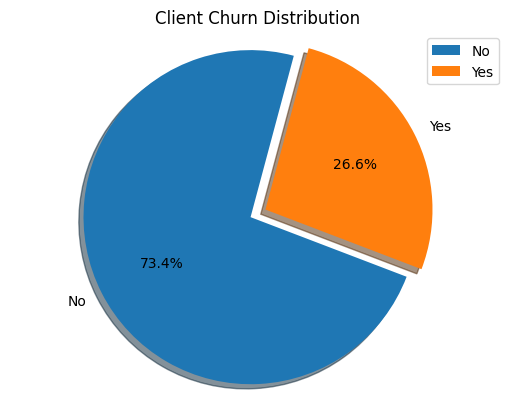

In [133]:
sizes=[5174,1879]
labels="No","Yes"
explode=(0, 0.1)
fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode,autopct='%1.1f%%',labels=labels, shadow=True, startangle=75)
ax1.axis('equal')
ax1.set_title("Client Churn Distribution")
ax1.legend(labels)
plt.show()


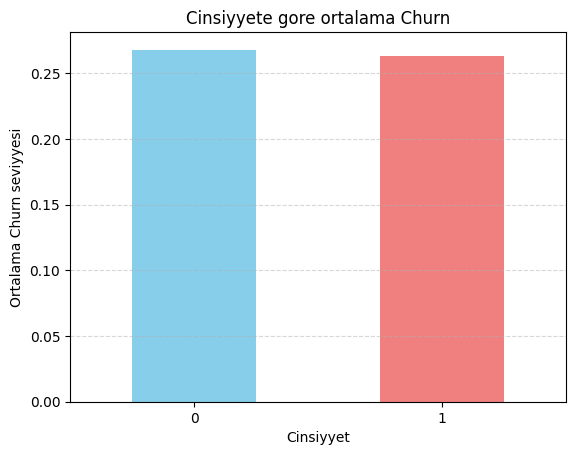

In [134]:
data = data[data["cinsiyyət"] != -1]

churn_means= data.groupby("cinsiyyət")["Churn"].mean()
#Bar plot
churn_means.plot(kind="bar", color=["skyblue","lightcoral"])

plt.title("Cinsiyyete gore ortalama Churn")
plt.xlabel("Cinsiyyet")
plt.ylabel("Ortalama Churn seviyyesi")
plt.xticks(rotation=0)
plt.grid(axis="y",linestyle="--",alpha=0.5)
plt.show()

In [148]:
data["TelefonXidməti,KağızsızHesablaşma"].value_counts()

,count
"TelefonXidməti,KağızsızHesablaşma",
2,3737
1,2535
0,385
3,286


In [149]:
data_copy = data.copy()
data_copy.drop(["id", "TelefonXidməti,KağızsızHesablaşma"],axis=1, inplace=True)

In [151]:
cat_cols = [col for col in data_copy.columns if data_copy[col].nunique() <= 10 and col != 'Churn']
print(cat_cols)


['cinsiyyət', 'Yaşlı təbəqə', 'tərəfdaş', 'asılı olanlar', 'Telefon Xidməti', 'Birdən çox xətt', 'İnternet servisi', 'onlayn təhlükəsizlik', 'onlayn yedəkləmə', 'Cihazın Mühafizəsi', 'texniki dəstək', 'canli tv', 'filmlər', 'müqavilə', 'Kağızsız Hesablaşma', 'ödəniş metodu']


<ipython-input-152-27ce5ceed213>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=col, y='Churn', data=data_copy, estimator=lambda x: sum(x)/len(x), palette='magma')


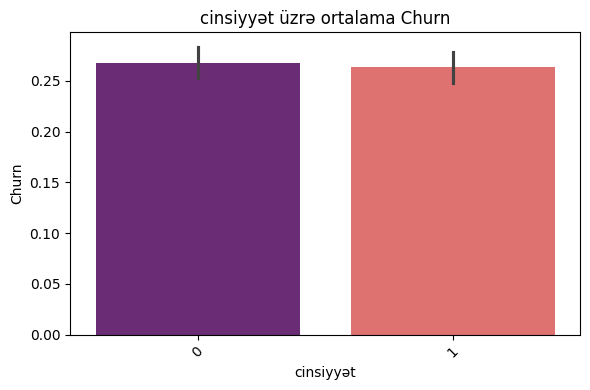

<ipython-input-152-27ce5ceed213>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=col, y='Churn', data=data_copy, estimator=lambda x: sum(x)/len(x), palette='magma')


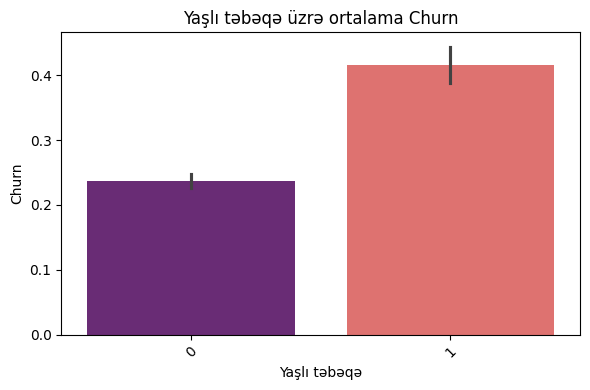

<ipython-input-152-27ce5ceed213>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=col, y='Churn', data=data_copy, estimator=lambda x: sum(x)/len(x), palette='magma')


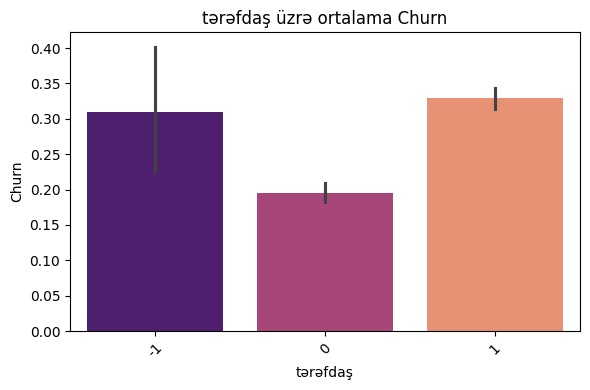

<ipython-input-152-27ce5ceed213>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=col, y='Churn', data=data_copy, estimator=lambda x: sum(x)/len(x), palette='magma')


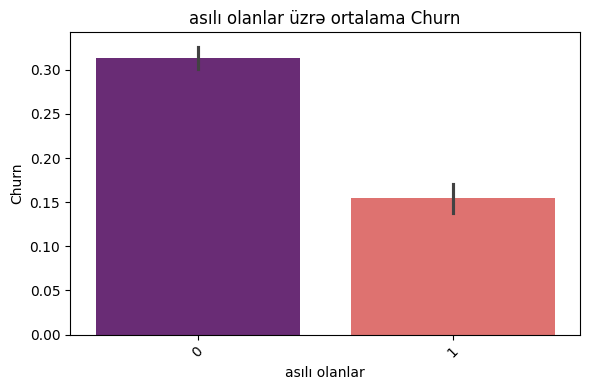

<ipython-input-152-27ce5ceed213>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=col, y='Churn', data=data_copy, estimator=lambda x: sum(x)/len(x), palette='magma')


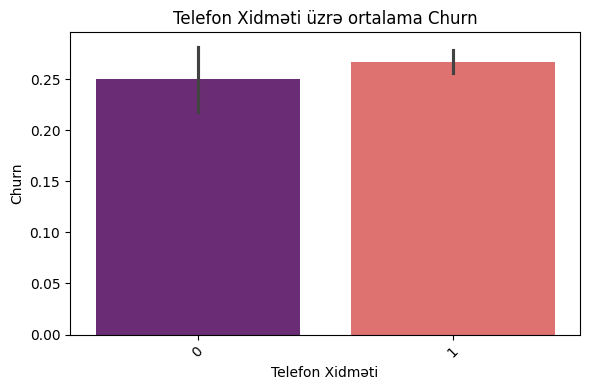

<ipython-input-152-27ce5ceed213>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=col, y='Churn', data=data_copy, estimator=lambda x: sum(x)/len(x), palette='magma')


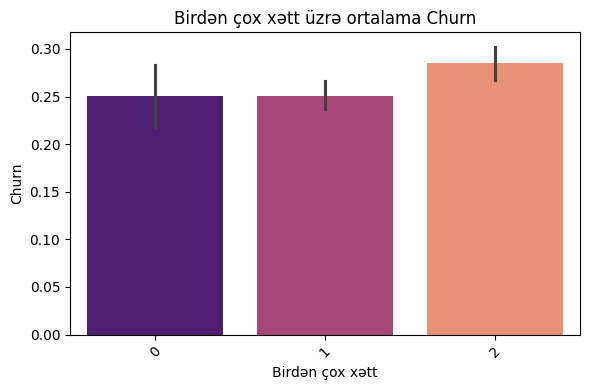

<ipython-input-152-27ce5ceed213>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=col, y='Churn', data=data_copy, estimator=lambda x: sum(x)/len(x), palette='magma')


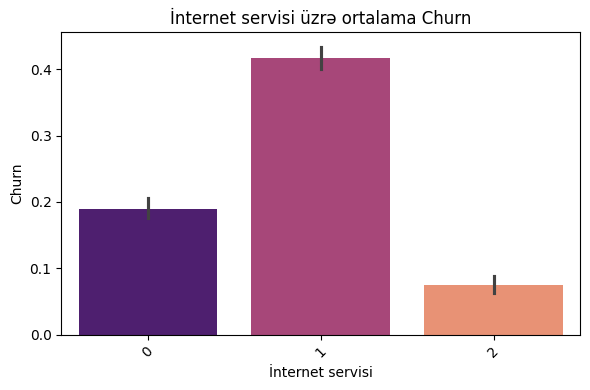

<ipython-input-152-27ce5ceed213>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=col, y='Churn', data=data_copy, estimator=lambda x: sum(x)/len(x), palette='magma')


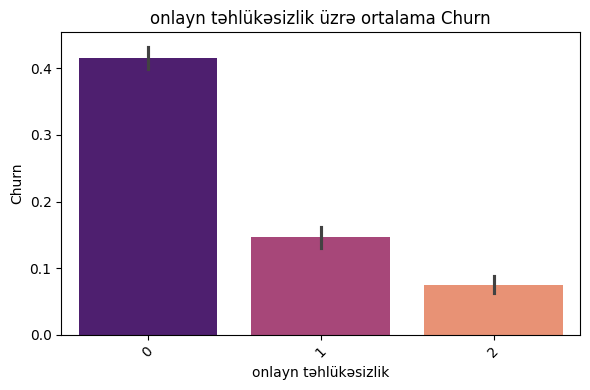

<ipython-input-152-27ce5ceed213>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=col, y='Churn', data=data_copy, estimator=lambda x: sum(x)/len(x), palette='magma')


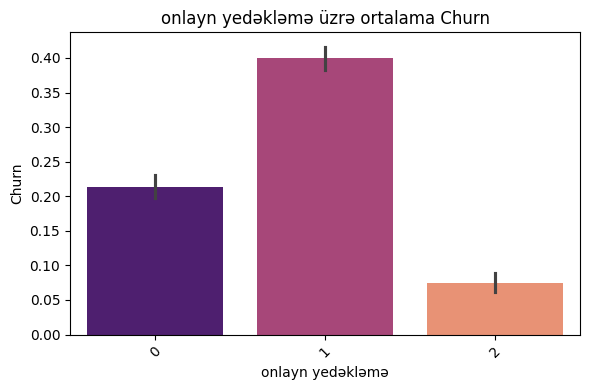

<ipython-input-152-27ce5ceed213>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=col, y='Churn', data=data_copy, estimator=lambda x: sum(x)/len(x), palette='magma')


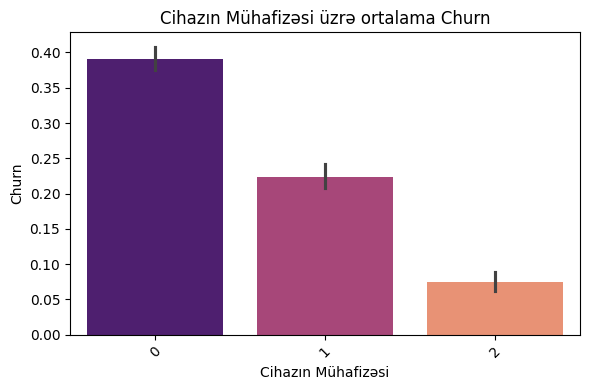

<ipython-input-152-27ce5ceed213>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=col, y='Churn', data=data_copy, estimator=lambda x: sum(x)/len(x), palette='magma')


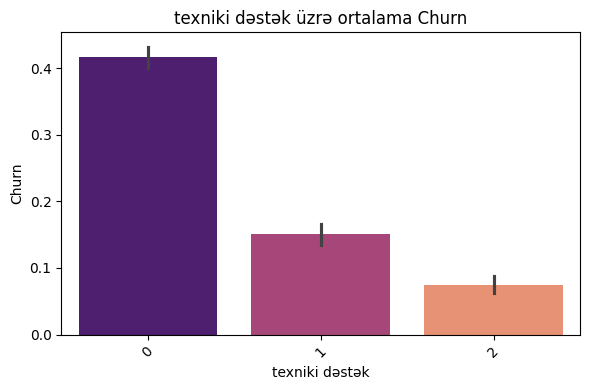

<ipython-input-152-27ce5ceed213>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=col, y='Churn', data=data_copy, estimator=lambda x: sum(x)/len(x), palette='magma')


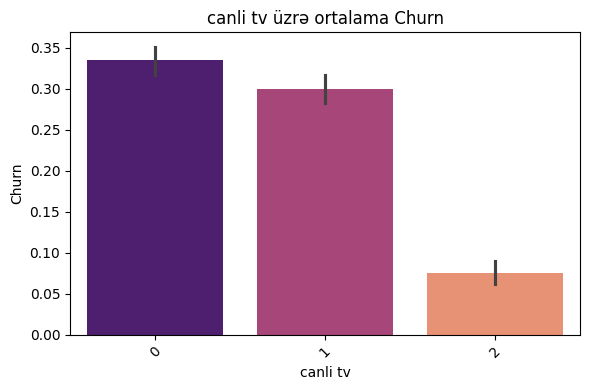

<ipython-input-152-27ce5ceed213>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=col, y='Churn', data=data_copy, estimator=lambda x: sum(x)/len(x), palette='magma')


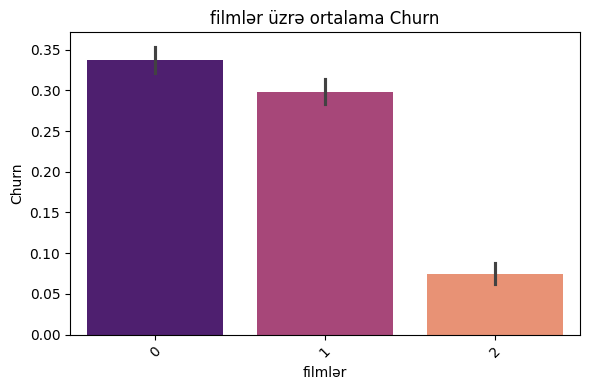

<ipython-input-152-27ce5ceed213>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=col, y='Churn', data=data_copy, estimator=lambda x: sum(x)/len(x), palette='magma')


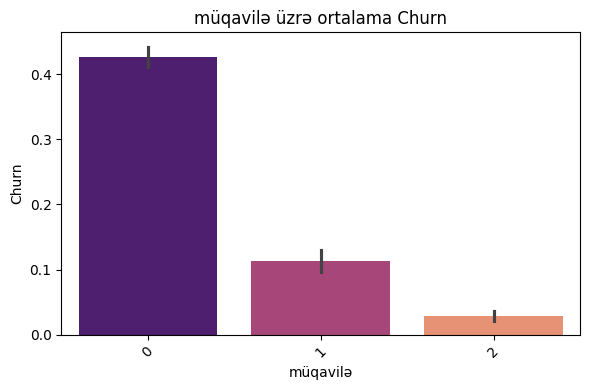

<ipython-input-152-27ce5ceed213>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=col, y='Churn', data=data_copy, estimator=lambda x: sum(x)/len(x), palette='magma')


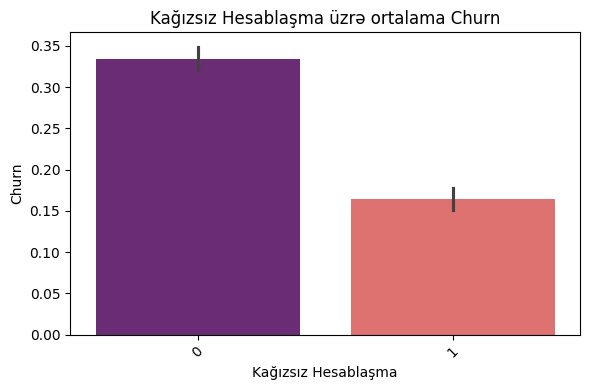

<ipython-input-152-27ce5ceed213>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=col, y='Churn', data=data_copy, estimator=lambda x: sum(x)/len(x), palette='magma')


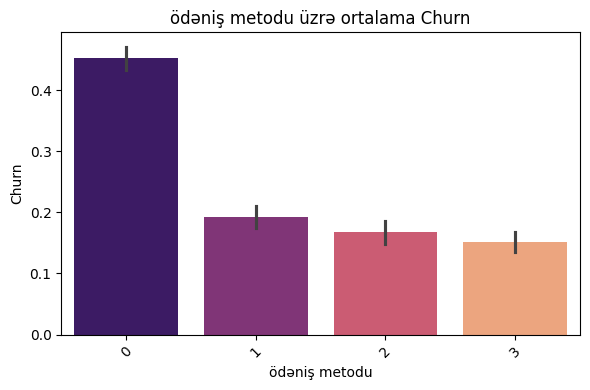

In [152]:
for col in cat_cols:
    plt.figure(figsize=(6,4))
    sns.barplot(x=col, y='Churn', data=data_copy, estimator=lambda x: sum(x)/len(x), palette='magma')
    plt.title(f"{col} üzrə ortalama Churn")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


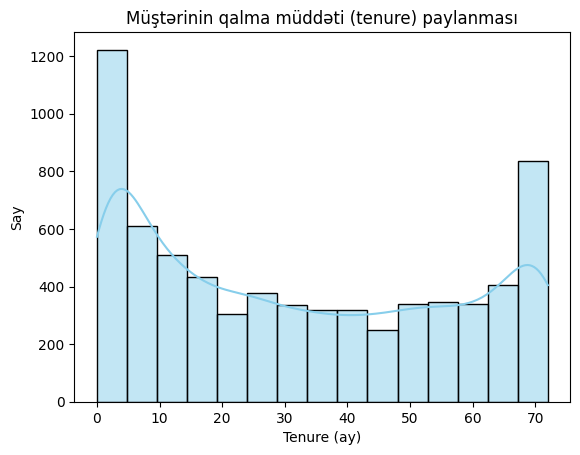

In [153]:
sns.histplot(data=data_copy, x="müddəti", kde=True, color="skyblue")
plt.title("Müştərinin qalma müddəti (tenure) paylanması")
plt.xlabel("Tenure (ay)")
plt.ylabel("Say")
plt.show()

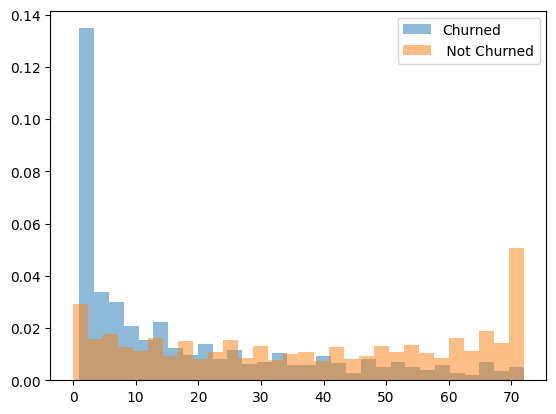

In [154]:
bins =30
plt.hist(data_copy[data_copy.Churn == 1].müddəti,
         bins, alpha=0.5, density=True,label="Churned")
plt.hist(data_copy[data_copy.Churn == 0].müddəti,
         bins, alpha=0.5, density=True,label=" Not Churned")
plt.legend(loc="upper right")
plt.show()

In [155]:
data_copy.columns

Index(['cinsiyyət', 'Yaşlı təbəqə', 'tərəfdaş', 'asılı olanlar', 'müddəti',
       'Telefon Xidməti', 'Birdən çox xətt', 'İnternet servisi',
       'onlayn təhlükəsizlik', 'onlayn yedəkləmə', 'Cihazın Mühafizəsi',
       'texniki dəstək', 'canli tv', 'filmlər', 'müqavilə',
       'Kağızsız Hesablaşma', 'ödəniş metodu', 'Aylıq Ödənişlər',
       'Ümumi ödənişlər', 'Churn'],
      dtype='object')

In [156]:
data_copy

,cinsiyyət,Yaşlı təbəqə,tərəfdaş,asılı olanlar,müddəti,Telefon Xidməti,Birdən çox xətt,İnternet servisi,onlayn təhlükəsizlik,onlayn yedəkləmə,Cihazın Mühafizəsi,texniki dəstək,canli tv,filmlər,müqavilə,Kağızsız Hesablaşma,ödəniş metodu,Aylıq Ödənişlər,Ümumi ödənişlər,Churn
0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,29.85,0,0
1,1,0,1,0,34,1,1,0,1,1,1,0,0,0,1,1,1,56.95,1,0
2,1,0,1,0,2,1,1,0,1,0,0,0,0,0,0,0,1,53.85,2,1
3,1,0,1,0,45,0,0,0,1,1,1,1,0,0,1,1,2,42.30,3,0
5,0,0,1,0,8,1,2,1,0,1,1,0,1,1,0,0,0,99.65,5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,0,1,24,1,2,0,1,1,1,1,1,1,1,0,1,84.80,6526,0
7039,0,0,0,1,72,1,2,1,0,0,1,0,1,1,1,0,3,103.20,6527,0
7040,0,0,0,1,11,0,0,0,1,1,0,0,0,0,0,0,0,29.60,6528,0
7041,1,1,0,0,4,1,2,1,0,1,0,0,0,0,0,0,1,74.40,6529,1


In [158]:
data_copy["Ümumi ödənişlər"].head(30)

,Ümumi ödənişlər
0,0
1,1
2,2
3,3
5,5
6,6
7,7
8,8
9,9
10,10
